<a href="https://colab.research.google.com/github/beitezhu/machinelearning/blob/main/Fish_Market_prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
fishdata = pd.read_csv('fulton.csv')

In [ ]:
fishdata.head()

,Mon,Tue,Wed,Thu,Date,Stormy,p,q
0,1,0,0,0,1,1,1.569217,8.994421
1,0,1,0,0,2,1,2.000000,7.707063
2,0,0,1,0,3,0,2.072321,8.350194
3,0,0,0,1,4,1,2.247139,8.656955
4,0,0,0,0,5,1,2.664327,7.844241


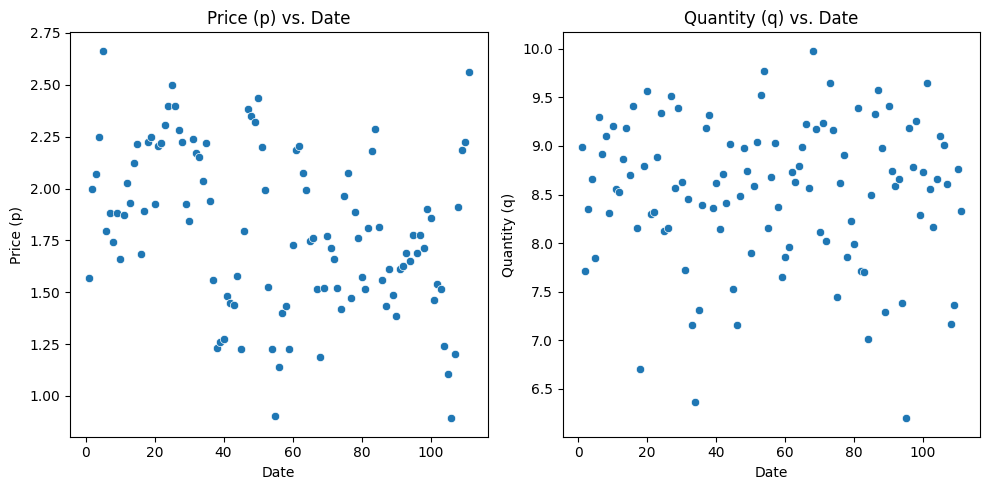

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Creating scatterplots without converting 'Date' to datetime format
plt.figure(figsize=(10, 5))

# Scatterplot for prices (p) vs Date
plt.subplot(1, 2, 1)
sns.scatterplot(x='Date', y='p', data=fishdata)
plt.title('Price (p) vs. Date')
plt.xlabel('Date')
plt.ylabel('Price (p)')

# Scatterplot for quantity (q) vs Date
plt.subplot(1, 2, 2)
sns.scatterplot(x='Date', y='q', data=fishdata)
plt.title('Quantity (q) vs. Date')
plt.xlabel('Date')
plt.ylabel('Quantity (q)')

plt.tight_layout()
plt.show()

1a）
The price data shows a notable variation throughout the period under review, but it does not display a distinct or consistent trend. The scatterplot reveals that prices oscillate between approximately 1.25 and 2.5, with some exceptional points indicating days where prices were unusually high or low compared to the average. The prices are spread widely across the entire period, without any apparent concentration around particular dates. This absence of a distinct upward or downward trend in the prices across the months suggests that the market prices for whiting are likely influenced by a variety of factors that cannot be immediately gleaned from the scatterplot. The presence of outliers may point to sporadic events or unique circumstances that had a significant impact on prices on certain days.

In [ ]:
# Average price and quantity on each weekday (Mon-Thu)
# Since the dataset has columns for each day, we'll calculate the average for these days
weekdays = ['Mon', 'Tue', 'Wed', 'Thu']
average_values = fishdata[fishdata[weekdays].sum(axis=1) == 1].groupby(weekdays).mean()[['p', 'q']]

# Finding the day with the highest average price
average_values['Day'] = average_values.idxmax(axis=1)
highest_price_day = average_values['p'].idxmax()

print(average_values)
print("Highest average price day:", highest_price_day)


                        p         q Day
Mon Tue Wed Thu                        
0   0   0   1    1.868307  8.762598   q
        1   0    1.798947  8.164622   q
    1   0   0    1.792573  8.207339   q
1   0   0   0    1.747336  8.763345   q
Highest average price day: (0, 0, 0, 1)


In [ ]:
# Add a column for each weekday name
fishdata['Weekday'] = fishdata[['Mon', 'Tue', 'Wed', 'Thu']].idxmax(axis=1)

# Calculate the average price and quantity for each weekday
average_weekday = fishdata.groupby('Weekday')[['p', 'q']].mean()

# Identify the day with the highest average price
highest_price_day = average_weekday['p'].idxmax()

print(average_weekday)
print("Day with highest average price:", highest_price_day)

                p         q
Weekday                    
Mon      1.784620  8.734888
Thu      1.868307  8.762598
Tue      1.792573  8.207339
Wed      1.798947  8.164622
Day with highest average price: Thu


1 b)
Mon      1.784620  8.734888

Tue      1.792573  8.207339

Wed      1.798947  8.164622

Thu      1.868307  8.762598

Day with highest average price: Thu


A plausible explanation for the observed higher fish prices on Thursdays could be rooted in the interplay of supply and demand throughout the week. It's possible that Thursdays experience a dip in supply owing to factors like the timing of fish restocking or specific fishing practices that vary during the week. Concurrently, demand might surge as consumers prepare for weekend activities or events, leading to increased purchases of fish for these occasions. To gain a comprehensive understanding of this pricing trend, it would be beneficial to examine broader market trends, consumer purchasing habits, and any external influences that might affect the balance between supply and demand. This analysis could include investigating local market schedules, seasonal variations in fishing yields, and any cultural or social events that typically occur towards the end of the week.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
X = fishdata[['Mon', 'Tue', 'Wed', 'Thu', 'p']]
y = fishdata['q']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_regression_model = smf.ols("q ~ p + Mon + Tue + Wed + Thu", data = fishdata)
linear_regression_results = linear_regression_model.fit()
print(linear_regression_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.940
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           7.08e-05
Time:                        02:58:38   Log-Likelihood:                -110.00
No. Observations:                 111   AIC:                             232.0
Df Residuals:                     105   BIC:                             248.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7320      0.336     28.936      0.0

2) a)

The linear regression equation is:


q=9.7320−0.5625×p+0.0143×Mon−0.5162×Tue−0.5554×Wed+0.0816×Thu


2) b)

The R-squared value of the model is approximately 0.220。This means that around 22% of the variability in the quantity sold can be explained by the model. This could be because important explanatory variables are missing from the model, the data inherently has a high level of randomness, or a linear model might not be the best fit for the data relationship.

p, Tue and Wed have p-values less than 0.05, suggesting that they are the independent variables which are significant.

2)c

The coefficient of the price variable (p) is -0.5625. The coefficient of -0.5625 for the price variable suggests that for each unit increase in price, the quantity sold decreases by 0.5625 units, on average, assuming all other variables in the model are held constant.

The negative coefficient for the price variable indicates an inverse relationship between price and quantity sold, meaning as the price increases, the quantity sold tends to decrease. This relationship can be utilized to predict the impact of price fluctuations on sales volume, under the assumption that the linear model accurately captures the relationship and other influencing factors remain unchanged. Nonetheless, it's crucial to account for potential external variables or confounding factors that might also influence this relationship, as the real-world applicability of the model may be limited by its simplicity and the assumptions on which it is based.

3 a)
Graddy suggests using two-day lagged weather as an instrument for prices (p), based on two essential criteria:

Relevance: Weather significantly affects supply, especially in sectors like agriculture, by influencing production and distribution. This impact on supply can, in turn, affect prices, aligning with the relevance criterion for an effective instrument.

Exogeneity:Exogeneity appears to be met as well, given that weather conditions from two days earlier are unlikely to have a direct influence on today's quantity sold, other than through their effects on supply, which then impacts prices.

b) The two-day lagged weather, used as an instrument, could correlate directly with the quantity of fish sold if consumer behavior or operational strategies adjust in anticipation of weather effects. For example, consumers might buy more fish ahead of anticipated bad weather, affecting sales independently of price changes. Similarly, fish markets might alter their operations based on weather forecasts, directly influencing the available quantity. These scenarios could lead to a direct relationship between past weather and current sales, potentially violating the instrument's exogeneity criterion by affecting the dependent variable outside of its impact on prices.


In [ ]:
!pip install linearmodels
from statsmodels.sandbox.regression.gmm import IV2SLS
from linearmodels.iv import IV2SLS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.0 MB/s eta 0:00:00



c) Now run an iv regression in python using IV2SLS function with the variable “Stormy” as an instrumental variable for price (p). Note, “Stormy” is set to 1 if it was stormy two days ago and is 0 otherwise.

In [ ]:
iv_regression  = IV2SLS.from_formula("q ~ 1+ Mon + Tue + Wed + Thu+ [p ~ Stormy] ", data=fishdata)
result_iv = iv_regression.fit()
result_iv

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                      q   R-squared:                      0.1391
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0981
No. Observations:                 111   F-statistic:                    24.946
Date:                Mon, Dec 11 2023   P-value (F-stat)                0.0001
Time:                        03:08:36   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      10.745     0.7860     13.671     0.0000      9.2043      12.285
Mon           -0.0254     0.2154    -0.1179     0.9061     -0.4475      0.3967
Tue           -0.5308     0.1966    -2.7004     0.0069     -0.9160     -0.1455
Wed           -0.5664     0.2013    -2.8141     0.0049     -0.9608     -0.1719
Thu            0.1093     0.1735     0.6296     0.5290     -0.2309      0.4494
p             -1.1194     0.4310    -2.5970     0.0094     -1.9643     -0.2746
==============================================================================

Endogenous: p
Instruments: Stormy
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x79d4fc5a61a0

3 d) The coefficient of price (p) in the IV regression is -1.1194, which is more negative than in the OLS model, implies that the OLS regression might have underestimated the adverse effect of price on quantity. This change aligns with expectations when transitioning from OLS to IV regression in certain contexts.

Using an instrumental variable, such as 'Stormy', aims to address endogeneity bias, which can arise from simultaneous causality, omitted variables, or measurement errors in OLS models. These issues can lead to biased and inconsistent estimates of the price coefficient.

A valid instrument, correlated with the endogenous regressor but uncorrelated with the error term, helps the IV regression yield a more consistent and unbiased estimate. Here, the more substantial negative coefficient in the IV regression indicates that the OLS approach likely understated the negative influence of price on quantity, reaffirming the importance of addressing endogeneity in regression analysis.

3) e)

q=10.745−0.0254 * Mon − 0.5308 * Tue−0.5664 * Wed+ 0.1093 * Thu−1.1194 * p

In [ ]:
coefficients = {
    'Mon': -0.0254,
    'Tue': -0.5308,
    'Wed': -0.5664,
    'Thu': 0.1093,
    'p': -1.1194
}
intercept = 10.745
price = 0.1

quant_monday = intercept + (coefficients['Mon'] * 1 + coefficients['p'] * price)
rev_monday = price  * quant_monday
print(f"4 a){rev_monday:.4f} revenue will be made at this price point on Monday by sold {quant_monday:.4f} quantities.")

4 a)1.0608 revenue will be made at this price point on Monday by sold 10.6077 quantities.


4-bc)

In [ ]:
prices = np.arange(0, 6.01, 0.01)

revenues = []
for price in prices:

    quantity = intercept + (coefficients['Mon'] * 1 + coefficients['p'] * price)
    revenue = price * quantity
    revenues.append(revenue)

optimal_index = np.argmax(revenues)
optimal_price = prices[optimal_index]
optimal_revenue = revenues[optimal_index]
print(f" The sellers should set price at {optimal_price} to maximize the revenue to {optimal_revenue} on Monday.")

 The sellers should set price at 4.79 to maximize the revenue to 25.663258459999998 on Monday.


On Monday, the optimal price to maximize revenue is $4.79, which would result in a revenue of $25.66.


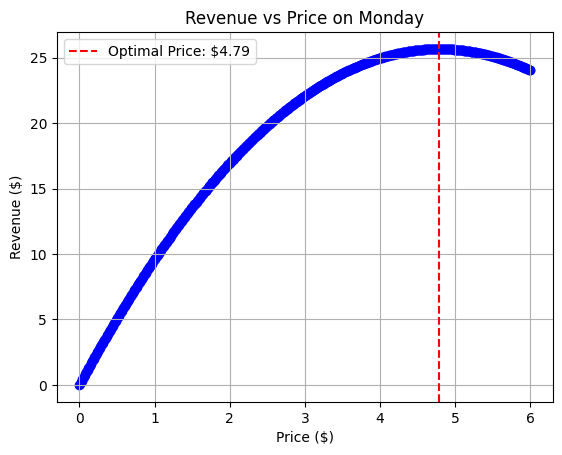

In [ ]:
prices = np.arange(0, 6.01, 0.01)

revenues = []
for price in prices:
    # Assuming 'intercept' and 'coefficients' are defined elsewhere in your code
    # Adjust the formula for quantity if needed
    quantity = intercept + coefficients['Mon'] + coefficients['p'] * price
    revenue = price * quantity
    revenues.append(revenue)

optimal_index = np.argmax(revenues)
optimal_price = prices[optimal_index]
optimal_revenue = revenues[optimal_index]
print(f"On Monday, the optimal price to maximize revenue is ${optimal_price:.2f}, which would result in a revenue of ${optimal_revenue:.2f}.")

# Plot the prices and corresponding revenues
plt.scatter(prices, revenues, color='blue', marker='o')
plt.title('Revenue vs Price on Monday')
plt.xlabel('Price ($)')
plt.ylabel('Revenue ($)')
plt.axvline(x=optimal_price, color='red', linestyle='--', label=f'Optimal Price: ${optimal_price:.2f}')
plt.legend()
plt.grid(True)
plt.show()

4-d)

On Tue, the optimal price to maximize revenue is $4.56, resulting in a revenue of $23.30.


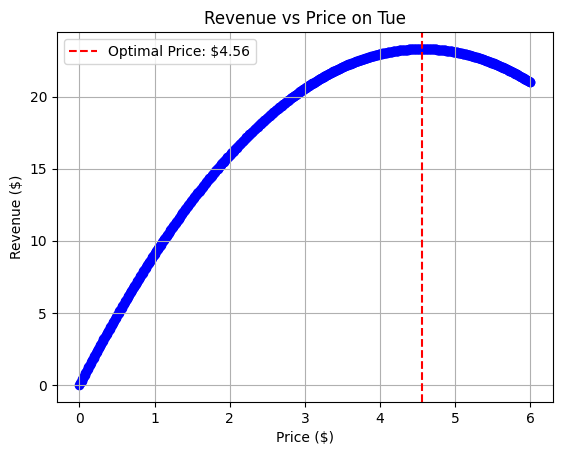

On Wed, the optimal price to maximize revenue is $4.55, resulting in a revenue of $23.14.


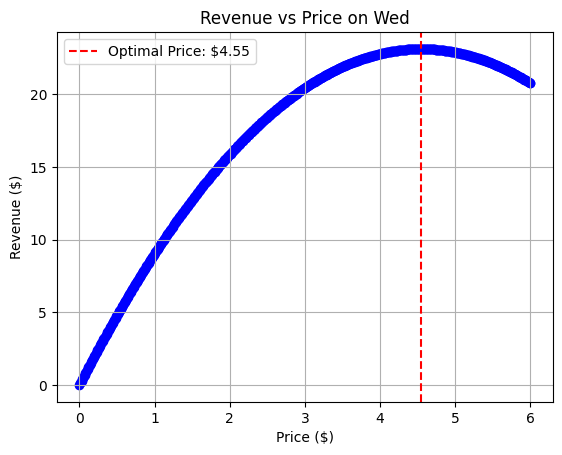

On Thu, the optimal price to maximize revenue is $4.85, resulting in a revenue of $26.31.


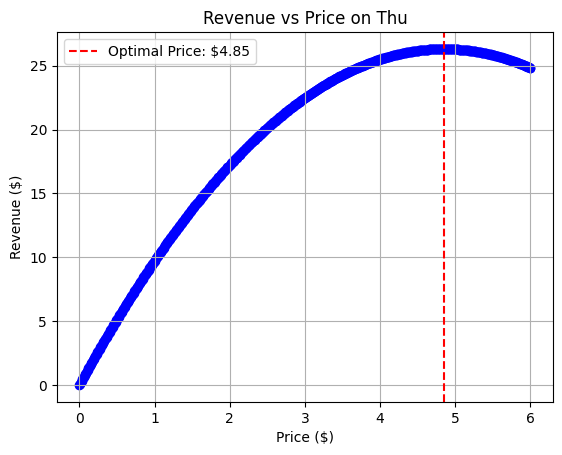

In [ ]:
# Assuming 'intercept' and 'coefficients' are defined elsewhere in your code
days = ['Tue', 'Wed', 'Thu']
prices = np.arange(0, 6.01, 0.01)

for day in days:
    revenues = []
    for price in prices:
        quantity = intercept + coefficients[day] + coefficients['p'] * price
        revenue = price * quantity
        revenues.append(revenue)

    optimal_index = np.argmax(revenues)
    optimal_price = prices[optimal_index]
    optimal_revenue = revenues[optimal_index]
    print(f"On {day}, the optimal price to maximize revenue is ${optimal_price:.2f}, resulting in a revenue of ${optimal_revenue:.2f}.")

    # Plot the prices and corresponding revenues
    plt.figure()
    plt.scatter(prices, revenues, color='blue', marker='o')
    plt.title(f'Revenue vs Price on {day}')
    plt.xlabel('Price ($)')
    plt.ylabel('Revenue ($)')
    plt.axvline(x=optimal_price, color='red', linestyle='--', label=f'Optimal Price: ${optimal_price:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()


On Tue, the optimal price is $4.56, resulting in max revenue of $23.30.
On Wed, the optimal price is $4.55, resulting in max revenue of $23.14.
On Thu, the optimal price is $4.85, resulting in max revenue of $26.31.


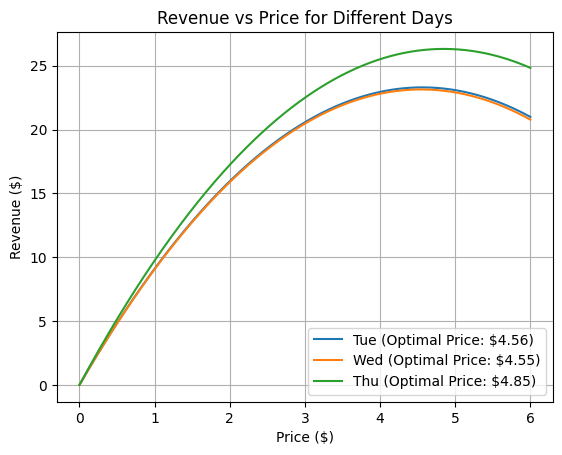

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'intercept' and 'coefficients' are defined elsewhere in your code

days = ['Tue', 'Wed', 'Thu']
prices = np.arange(0, 6.01, 0.01)

plt.figure()

for day in days:
    revenues = []
    for price in prices:
        quantity = intercept + coefficients[day] + coefficients['p'] * price
        revenue = price * quantity
        revenues.append(revenue)

    optimal_index = np.argmax(revenues)
    optimal_price = prices[optimal_index]
    optimal_revenue = revenues[optimal_index]

    print(f"On {day}, the optimal price is ${optimal_price:.2f}, resulting in max revenue of ${optimal_revenue:.2f}.")

    plt.plot(prices, revenues, label=f'{day} (Optimal Price: ${optimal_price:.2f})')

# Configure and display the plot
plt.title('Revenue vs Price for Different Days')
plt.xlabel('Price ($)')
plt.ylabel('Revenue ($)')
plt.legend()
plt.grid(True)
plt.show()
